# Machine Learning Models.
*Lecture by Akhona Njeje*

**Logistic Regression model 1.**

In [8]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 rows of dummy data
data = pd.DataFrame({
    'Sales': np.random.normal(50000, 15000, 100),
    'Revenue': np.random.normal(70000, 20000, 100),
    'Marketing_Spend': np.random.normal(10000, 5000, 100),
    'Customer_Count': np.random.randint(50, 300, 100),
    'Store_Size': np.random.normal(2000, 500, 100),
    'Region': np.random.choice([1, 2, 3, 4], 100),
    'Discount': np.random.normal(0.1, 0.05, 100),
    'Profit': np.random.choice([0, 1], 100)  # Target variable
})

# Show the first few rows of data
data.head()

,Sales,Revenue,Marketing_Spend,Customer_Count,Store_Size,Region,Discount,Profit
0,57450.712295,41692.585159,11788.936802,298,2443.100983,2,0.081047,0
1,47926.035482,61587.093545,12803.922632,213,1883.148410,2,0.047021,0
2,59715.328072,63145.709669,15415.256216,187,2022.175279,2,0.109075,0
3,72845.447846,53954.454616,15269.010260,150,1411.936261,2,0.061238,0
4,46487.699379,66774.285767,3111.653160,250,2222.753451,3,0.101188,0


In [2]:
# Check for missing values
print(data.isnull().sum())

# Encode categorical variables if needed (e.g., 'Region')
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# Split data into features and target
X = data.drop('Profit', axis=1)
y = data['Profit']

Sales              0
Revenue            0
Marketing_Spend    0
Customer_Count     0
Store_Size         0
Region             0
Discount           0
Profit             0
dtype: int64


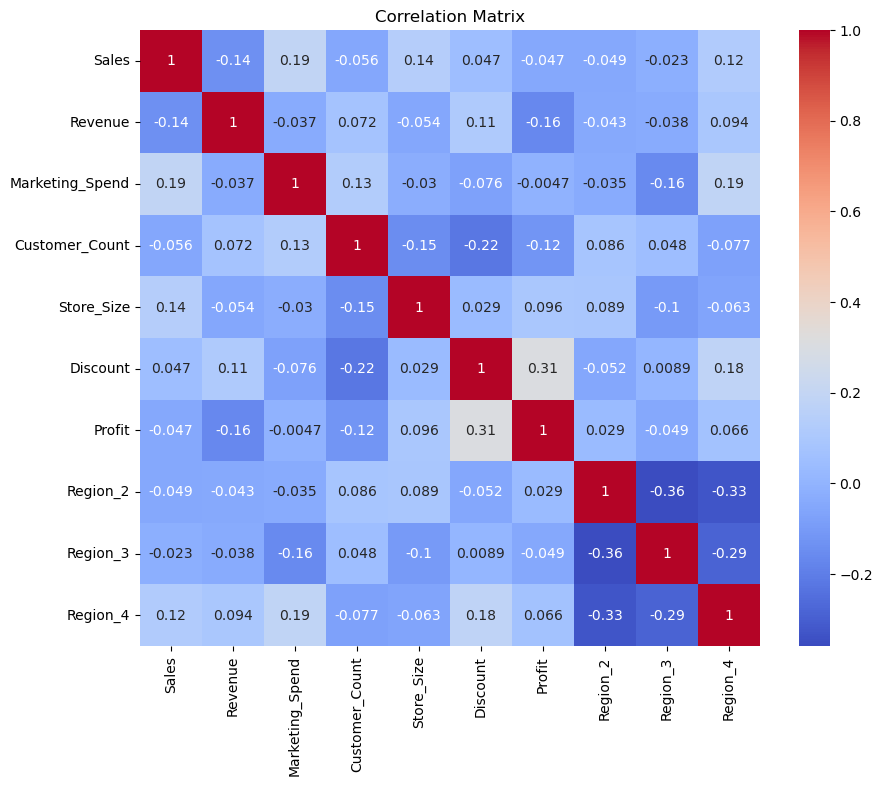

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.36      0.36        11
           1       0.22      0.22      0.22         9

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20

Confusion Matrix:
 [[4 7]
 [7 2]]


In [7]:
def predict_profit(sales, revenue, marketing_spend, customer_count, store_size, region, discount):
    # Create a DataFrame for the single prediction
    data = pd.DataFrame({
        'Sales': [sales],
        'Revenue': [revenue],
        'Marketing_Spend': [marketing_spend],
        'Customer_Count': [customer_count],
        'Store_Size': [store_size],
        'Discount': [discount],
        'Region_2': [1 if region == 2 else 0],
        'Region_3': [1 if region == 3 else 0],
        'Region_4': [1 if region == 4 else 0]
    })

    # Predict using the trained model
    prediction = model.predict(data)[0]
    return "Profit" if prediction == 1 else "No Profit"

# Example prediction
print(predict_profit(60000, 80000, 12000, 150, 2200, 2, 0.15))

No Profit


**Linear regression model 2.**

In [9]:
# Define features and target
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
columns_list = data.columns.tolist()
print(columns_list)

['Sales', 'Revenue', 'Marketing_Spend', 'Customer_Count', 'Store_Size', 'Region', 'Discount', 'Profit']


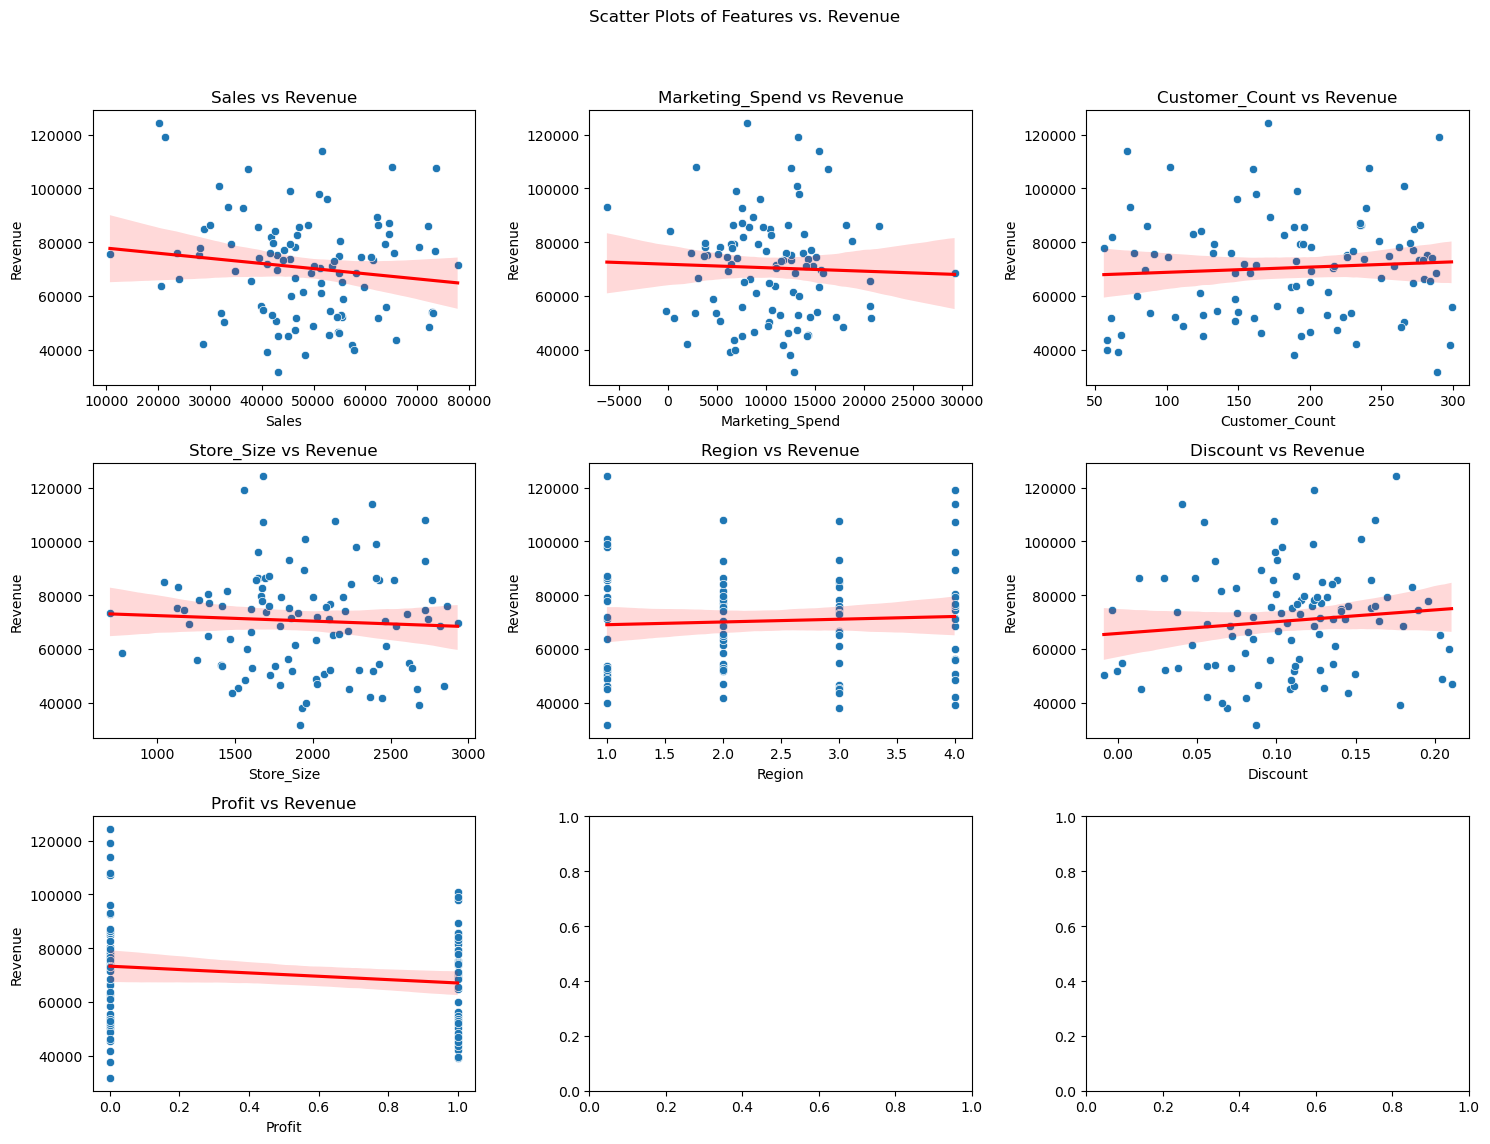

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots with trend lines
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Scatter Plots of Features vs. Revenue")

# Define feature names
features = X.columns

# Plot each feature vs Revenue
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(data=data, x=feature, y='Revenue', ax=axes[row, col])
    sns.regplot(data=data, x=feature, y='Revenue', ax=axes[row, col], scatter=False, color='red')
    axes[row, col].set_title(f"{feature} vs Revenue")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 17111.821265385275
Mean Squared Error (MSE): 492419222.02256787
Root Mean Squared Error (RMSE): 22190.520994843
R-squared (R²): -0.3902170886239209


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


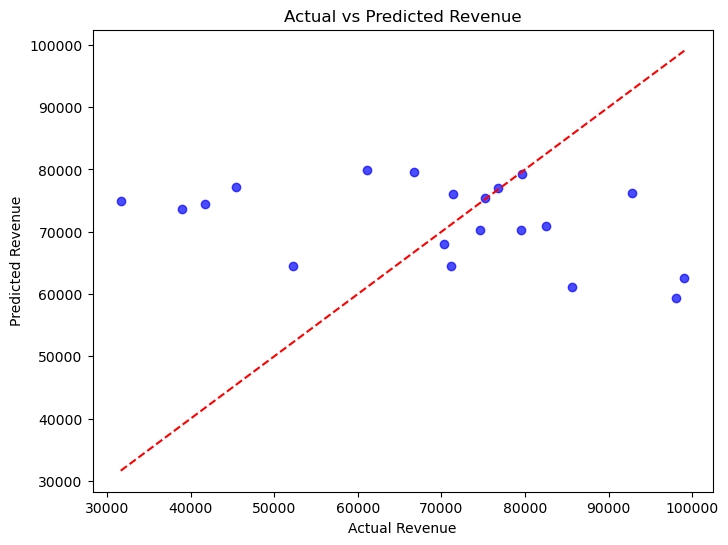

In [13]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of best fit
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

In [ ]:
# Key Metrics

# Mean Absolute Error (MAE):
# Definition: The average of the absolute differences between predicted and actual values.
# Meaning: On average, our predictions are off by this amount. Lower MAE indicates better accuracy.

# Mean Squared Error (MSE):
# Definition: The average of the squared differences between predicted and actual values.
# Meaning: MSE gives more weight to larger errors, so it penalizes large deviations more than MAE. Lower MSE is better.

# Root Mean Squared Error (RMSE):
# Definition: The square root of MSE.
# Meaning: This metric is in the same units as the target variable (Revenue), making it easier to interpret than MSE. 
# Like MSE, lower RMSE indicates better performance.

# R-squared (R²):
# Definition: Proportion of the variance in the target variable that is explained by the features in the model.
# Meaning: R² ranges from 0 to 1, where values closer to 1 indicate that the model explains most of the variability in the target. 
# Higher R² means a better fit.

# Summary
# Scatter plots showed the relationships between features and Revenue.
# Linear Regression Model helped to predict Revenue based on other sales-related factors.
# Evaluation Metrics like MAE, MSE, RMSE, and R² gave insights into how close our predictions were to actual values, 
# and the R² value indicated how well our model captured the data’s variability.
# This approach provides a solid foundation for understanding how linear regression can be used in predicting financial metrics like Revenue.

In [15]:
# Generate future data
forecast_period = 10  # number of forecasted points
future_data = pd.DataFrame({
    'Sales': np.random.normal(data['Sales'].mean(), data['Sales'].std(), forecast_period),
    'Marketing_Spend': np.random.normal(data['Marketing_Spend'].mean(), data['Marketing_Spend'].std(), forecast_period),
    'Customer_Count': np.random.randint(50, 300, forecast_period),
    'Store_Size': np.random.normal(data['Store_Size'].mean(), data['Store_Size'].std(), forecast_period),
    'Discount': np.random.normal(data['Discount'].mean(), data['Discount'].std(), forecast_period),
    'Region': np.random.choice([1, 2, 3, 4], forecast_period)
})

# One-hot encode the Region column to match the original data
future_data = pd.get_dummies(future_data, columns=['Region'], drop_first=True)

# Ensure all columns match by adding missing columns as 0 values
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0

# Reorder columns to match the original training set
future_data = future_data[X.columns]

In [16]:
# Predict Revenue for the forecast period
future_predictions = linear_model.predict(future_data)

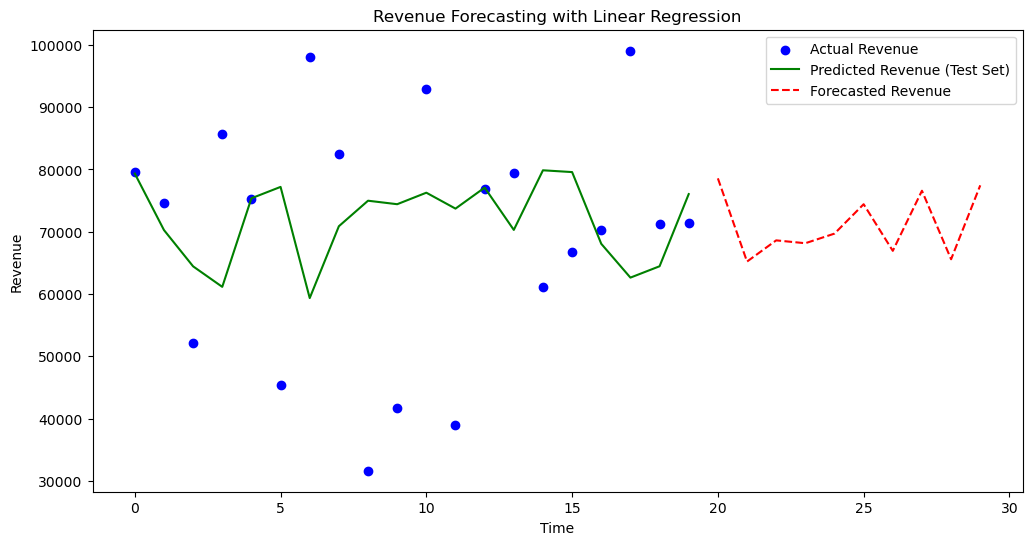

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Combine predictions for plotting
y_full = np.concatenate([y_pred, future_predictions])
time_range = np.arange(len(y_test) + len(future_predictions))

# Plot actuals, predictions, and forecasted values
plt.figure(figsize=(12, 6))

# Actual values for the test set
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Revenue')
plt.plot(np.arange(len(y_test)), y_pred, color='green', label='Predicted Revenue (Test Set)')

# Extend the plot to include forecasted values
forecast_index = np.arange(len(y_test), len(y_test) + len(future_predictions))
plt.plot(forecast_index, future_predictions, color='red', linestyle='--', label='Forecasted Revenue')

plt.xlabel("Time")
plt.ylabel("Revenue")
plt.title("Revenue Forecasting with Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Summary

# This approach:
# Ensures the forecast data has the same columns as the training data.
# Extends the prediction with a forecast to visualize future revenue.
# The blue points represent actual test data, the green line shows test set predictions, 
# and the red dashed line represents the forecasted revenue for future periods.

In [19]:
columns_list = data.columns.tolist()
print(columns_list)

['Sales', 'Revenue', 'Marketing_Spend', 'Customer_Count', 'Store_Size', 'Region', 'Discount', 'Profit']
